In [2]:
import json
import numpy as np

In [3]:
from joblib import load

file_path = '../knowledgebase/labeled_encoded_queries.jsonl'
classifier_path = '../../query_classifier.joblib'
vectorizer_path = '../../vectorizer.joblib'

In [4]:
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

queries = [item["query"] for item in data]
labels = [item["label_encoded"] for item in data]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    queries, labels, test_size = 0.2, stratify = labels, random_state = 42)

In [5]:
classifier = load(classifier_path)
vectorizer = load(vectorizer_path)

In [6]:
from sklearn.metrics import classification_report

X_test_vectorized = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vectorized)

report = classification_report(y_test, y_pred, target_names=["dense", "sparse", "hybrid"])
print(report)

              precision    recall  f1-score   support

       dense       0.89      0.80      0.84      1505
      sparse       0.00      0.00      0.00         2
      hybrid       0.68      0.82      0.75       799

    accuracy                           0.80      2306
   macro avg       0.53      0.54      0.53      2306
weighted avg       0.82      0.80      0.81      2306



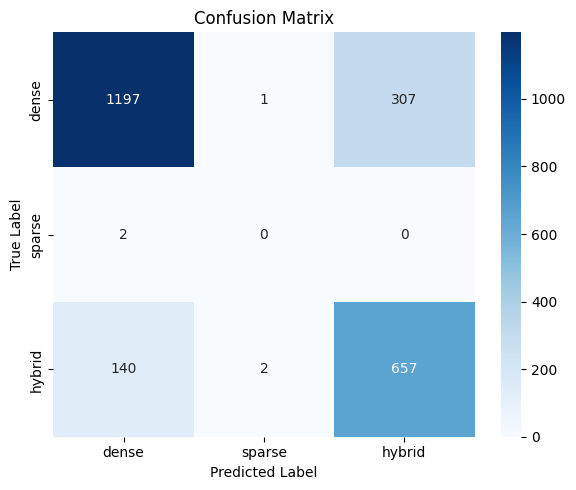

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
labels_names = ["dense", "sparse", "hybrid"]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_names, yticklabels=labels_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()